## Time Series Analysis On BSE 

### Loading the Libraries 

In [89]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
import quandl as quandl


### Bajaj Electricals Ltd. (500031) Adjusted Stock Prices

In [90]:
BajajElect = quandl.get("XBOM/500031", authtoken="gmN2xKGChq4zRr3b7wNm")

In [91]:
### Remove The Index
BajajElect.reset_index(inplace=True)

In [92]:
### Top of Data
BajajElect.head()

,Date,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
0,2007-01-02,39.916862,40.094772,38.879779,39.218241,28000.0,NaN,NaN
1,2007-01-03,38.714887,40.181557,38.714887,40.021004,30480.0,NaN,NaN
2,2007-01-04,40.615483,40.702268,39.400490,40.541716,10260.0,NaN,NaN
3,2007-01-05,40.268342,40.355128,39.053349,39.812720,21430.0,NaN,NaN
4,2007-01-08,40.355128,43.045469,40.103450,42.160260,59870.0,NaN,NaN


In [93]:
### Bottom of Data
BajajElect.tail()

,Date,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
3104,2018-11-26,471.00,471.00,459.05,462.05,13493.0,NaN,NaN
3105,2018-11-27,458.65,460.80,451.00,455.60,12365.0,NaN,NaN
3106,2018-11-28,461.35,473.00,455.70,471.00,27896.0,NaN,NaN
3107,2018-11-29,470.95,477.80,469.65,472.25,16843.0,NaN,NaN
3108,2018-11-30,471.80,483.75,468.90,471.90,21052.0,NaN,NaN


### Dimention Of Data 

In [94]:
BajajElect.shape

(3109, 8)

### Information or Structure Of Bajaj Electricals Stock Data

In [95]:
BajajElect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 8 columns):
Date                 3109 non-null datetime64[ns]
Open                 3109 non-null float64
High                 3109 non-null float64
Low                  3109 non-null float64
Close                3109 non-null float64
Volume               3109 non-null float64
Adjustment Factor    13 non-null float64
Adjustment Type      13 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 194.4 KB


### Dercription Of Bajaj Electricals Stock Data

In [96]:
BajajElect.describe()

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
count,3109.000000,3109.000000,3109.000000,3109.000000,3.109000e+03,13.000000,13.000000
mean,213.788837,217.762902,209.814204,213.215729,5.086763e+04,0.889181,15.769231
std,130.571336,133.165423,128.106523,130.196836,1.970932e+05,0.247065,3.419402
min,24.516465,25.147172,24.327253,25.147172,0.000000e+00,0.200000,5.000000
25%,146.739337,148.741880,144.374548,145.650397,8.481000e+03,0.981363,17.000000
50%,199.885167,204.651793,196.666548,199.487683,2.051500e+04,0.985762,17.000000
75%,258.746040,262.246605,253.769146,257.217624,4.437400e+04,0.989761,17.000000
max,684.831605,702.280494,656.197531,679.661564,7.700204e+06,0.995623,17.000000


### Convert Date Column in Date and TIme Format

In [97]:
BajajElect.Date = pd.to_datetime(BajajElect.Date)

### Cheking the Null Values

In [98]:
BajajElect.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
Adjustment Factor    3096
Adjustment Type      3096
dtype: int64

## Data Visualization

### Bajaj Electrical Closing Price Trend

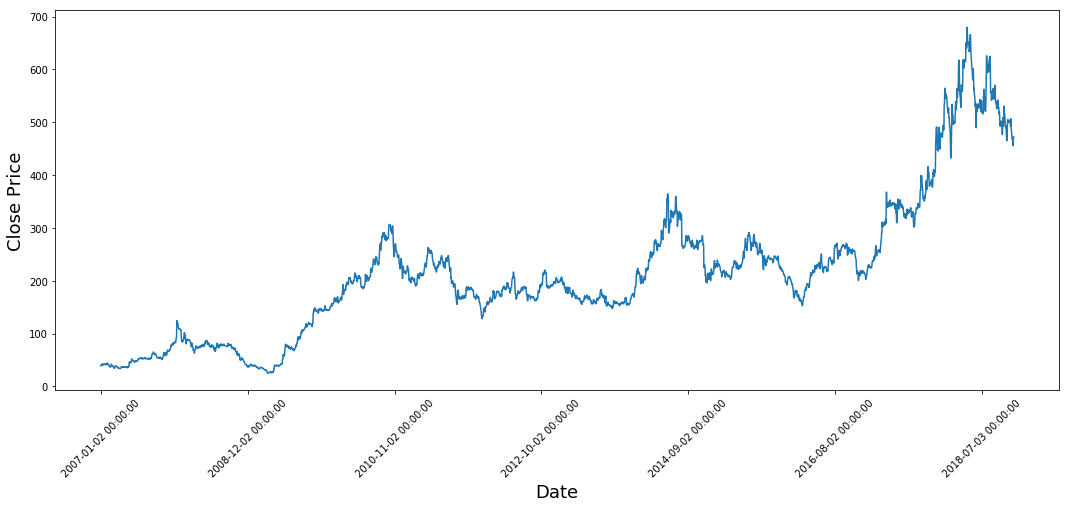

In [99]:
#### Now let's see what sort of data you have. You want data with various patterns occurring over time.
plt.figure(figsize = (18,7))
plt.plot(range(BajajElect.shape[0]),(BajajElect['Close']))
plt.xticks(range(0,BajajElect.shape[0],500),BajajElect['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

### Bajaj Electrical Mid Price Trend 

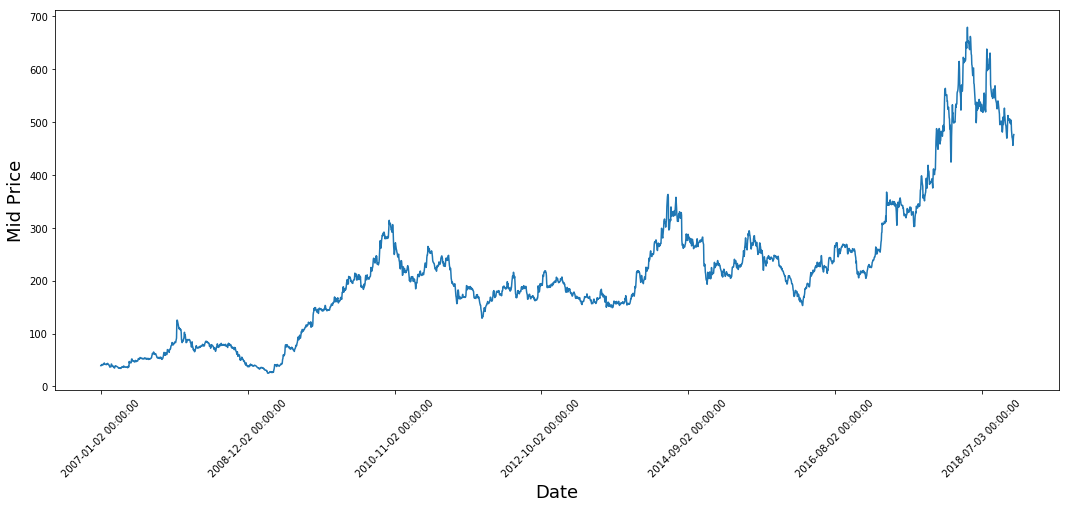

In [100]:
plt.figure(figsize = (18,7))
plt.plot(range(BajajElect.shape[0]),(BajajElect['Low']+BajajElect['High'])/2.0)
plt.xticks(range(0,BajajElect.shape[0],500),BajajElect['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

### Splitting Data into a Training set and a Test set (Sampling Data)

In [101]:
high_prices = BajajElect.loc[:,'High'].as_matrix()
low_prices = BajajElect.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

C:\Users\NitinKhandare\AppData\Local\Continuum\anaconda3\envs\ANN\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\NitinKhandare\AppData\Local\Continuum\anaconda3\envs\ANN\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [102]:
train_data = mid_prices[:2500]
test_data = mid_prices[2500:]

### Normalizing the Data
Now you need to define a scaler to normalize the data.

In [103]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [104]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 500
for di in range(0,2000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

Reshape the data back to the shape of [data_size]

In [105]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

###### You can now smooth the data using the exponential moving average.
This helps you to get rid of the inherent raggedness of the data in stock prices and produce a smoother curve.
Note that you should only smooth training data.¶

#### Now perform exponential moving average smoothing

In [106]:
# So the data will have a smoother curve than the original ragged data

EMA = 0.0
gamma = 0.1
for ti in range(2500):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

    
# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

### One-Step Ahead Prediction via Averaging

### Standard Average

In [107]:
window_size = 30
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = BajajElect.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.00253


Take a look at the averaged results below. It follows the actual behavior of stock quite closely. Next, you will look at a more accurate one-step prediction method.

### Standard Average method's Predicted Visualization¶

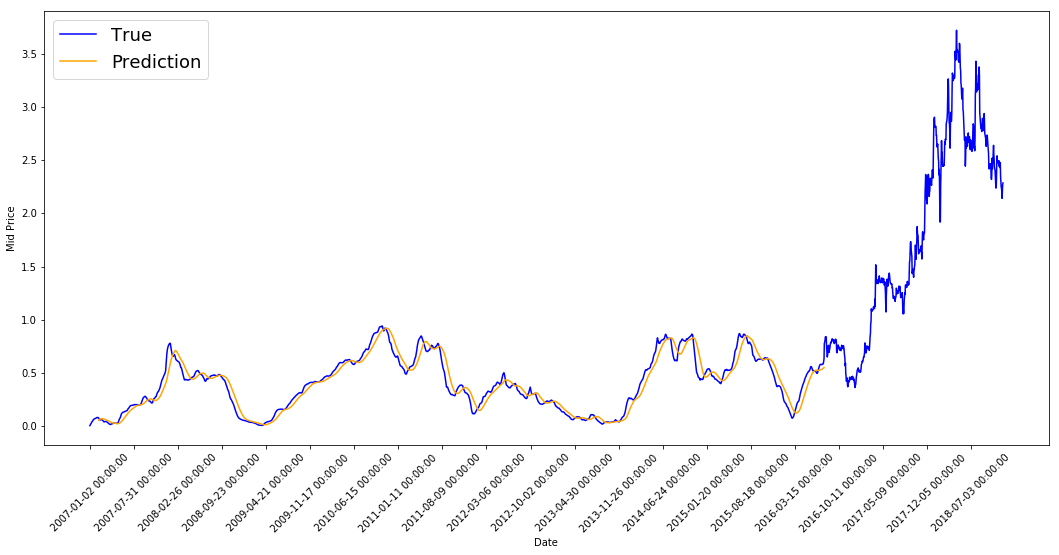

In [108]:
plt.figure(figsize = (18,8))
plt.plot(range(BajajElect.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
plt.xticks(range(0,BajajElect.shape[0],150),BajajElect['Date'].loc[::150],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

### Exponential Moving Average

In [112]:
window_size = 25
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00008


### Exponential Moving Average Method's Predicted Visualization

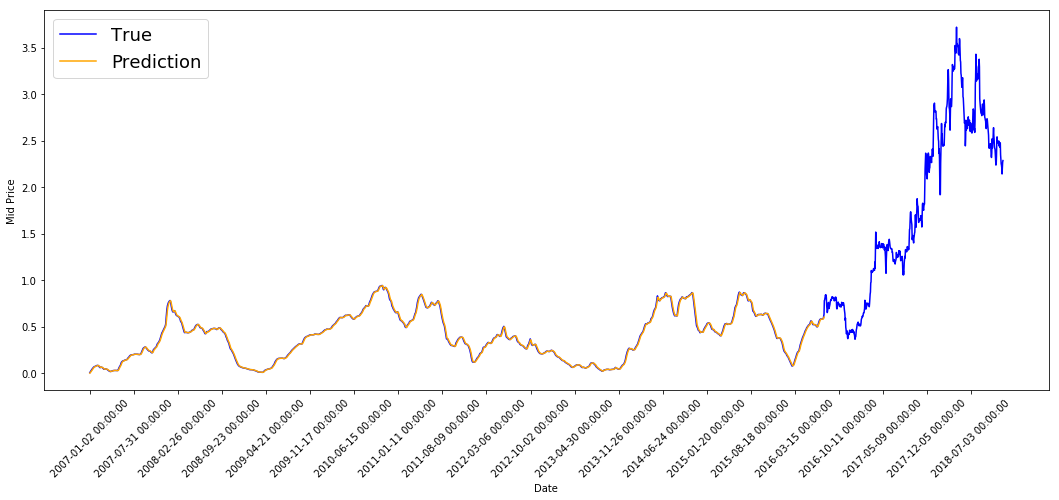

In [113]:
plt.figure(figsize = (18,7))
plt.plot(range(BajajElect.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
plt.xticks(range(0,BajajElect.shape[0],150),BajajElect['Date'].loc[::150],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

### Introduction to LSTMs: Making Stock Movement Predictions Far into the Future

#### Data Generator
You are first going to implement a data generator to train your model. This data generator will have a method called .unroll_batches(...) which will output a set of num_unrollings batches of input data obtained sequentially, where a batch of data is of size [batch_size, 1]. Then each batch of input data will have a corresponding output batch of data.

#### Data Augmentation
Also to make your model robust you will not make the output for 𝑥𝑡 always 𝑥𝑡+1. Rather you will randomly sample an output from the set 𝑥𝑡+1,𝑥𝑡+2,…,𝑥𝑡+𝑁 where 𝑁 is a small window size.


In [114]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.00583593 0.12130418 0.9138172  0.34872106 0.617368  ]

	Output: [0.01639406 0.11345488 0.9000912  0.35144946 0.6137746 ]


Unrolled index 1
	Inputs:  [0.01104555 0.11345488 0.9000912  0.35788608 0.6160556 ]

	Output: [0.01639406 0.08974135 0.9000912  0.33730745 0.64928645]


Unrolled index 2
	Inputs:  [0.01639406 0.10637804 0.8959605  0.3677086  0.6137746 ]

	Output: [0.01639406 0.0950043  0.91940975 0.35144946 0.64928645]


Unrolled index 3
	Inputs:  [0.02082795 0.10019746 0.89704263 0.35144946 0.617221  ]

	Output: [0.04054562 0.0950043  0.9040733  0.30384755 0.64928645]


Unrolled index 4
	Inputs:  [0.02686451 0.0950043  0.9040733  0.33730745 0.64928645]

	Output: [0.02686451 0.08974135 0.9040733  0.312188   0.64928645]


### Defining Hyperparameters

In [115]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1

num_unrollings = 50 # Number of time steps you look into the future.

batch_size = 300 # Number of samples in a batch

num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using

n_layers = len(num_nodes) # number of layers

dropout = 0.5 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

### Defining Inputs and Outputs
Next you define placeholders for training inputs and labels. This is very straightforward as you have a list of input placeholders, where each placeholder contains a single batch of data. And the list has num_unrollings placeholders, that will be used at once for a single optimization step.

In [116]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

### Defining Parameters of the LSTM and Regression layer

You will have a three layers of LSTMs and a linear regression layer, denoted by w and b, that takes the output of the last Long Short-Term Memory cell and output the prediction for the next time step. You can use the MultiRNNCell in TensorFlow to encapsulate the three LSTMCell objects you created. Additionally, you can have the dropout implemented LSTM cells, as they improve performance and reduce overfitting.

In [117]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

#### Calculating LSTM output and Feeding it to the regression layer to get final prediction

In [118]:
# Create cell state and hidden state variables to maintain the state of the LSTM

c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

### Loss Calculation and Optimizer

In [119]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


#### Prediction Related Calculations

In [120]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


#### Running the LSTM

In [ ]:

epochs = 40

valid_summary = 1 # Interval you make test predictions

n_predict_once = 40 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data


train_mse_ot = [] # Accumulate Train losses
test_mse_ot = []  # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions


session = tf.InteractiveSession()


tf.global_variables_initializer().run()


# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2    # If the test error hasn't increased in this many steps, decrease learning rate


print('Initialized')
average_loss = 0


# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)


x_axis_seq = []


# Points you start your test predictions from
test_points_seq = np.arange(2500,3000,30).tolist()


for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

C:\Users\NitinKhandare\AppData\Local\Continuum\anaconda3\envs\ANN\lib\site-packages\tensorflow\python\client\session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 4.778563
	Test MSE: 1.33112
	Finished Predictions
Average loss at step 2: 1.620622
	Test MSE: 0.18219
	Finished Predictions
Average loss at step 3: 0.777205
	Test MSE: 0.23266
	Finished Predictions
Average loss at step 4: 0.392962
	Test MSE: 0.37822
	Finished Predictions
Average loss at step 5: 0.366972
	Decreasing learning rate by 0.5
	Test MSE: 0.21974
	Finished Predictions
Average loss at step 6: 0.289532
	Test MSE: 0.32069
	Finished Predictions
Average loss at step 7: 0.278962
	Test MSE: 0.18075
	Finished Predictions


### Visualizing the Predictions

In [ ]:
### replace this with the epoch that you got the best results when running the plotting code
best_prediction_epoch = 30   
plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(RELIANCE.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])
       
plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(2500,3000)
plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(RELIANCE.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')
  
plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(2500,3000)
plt.show()

#### Quick Heal Technologies Ltd EOD Prices

In [ ]:
Quickheal = quandl.get("BSE/BOM539678", authtoken="gmN2xKGChq4zRr3b7wNm")

#### Max India Ltd EOD Prices

In [ ]:
MaxIndia = quandl.get("BSE/BOM539981", authtoken="gmN2xKGChq4zRr3b7wNm")